In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.formula.api as smf

In [11]:
df=pd.read_csv('Salary_Data.csv')

In [12]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Checking wheather the data contain any null values or not

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [14]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

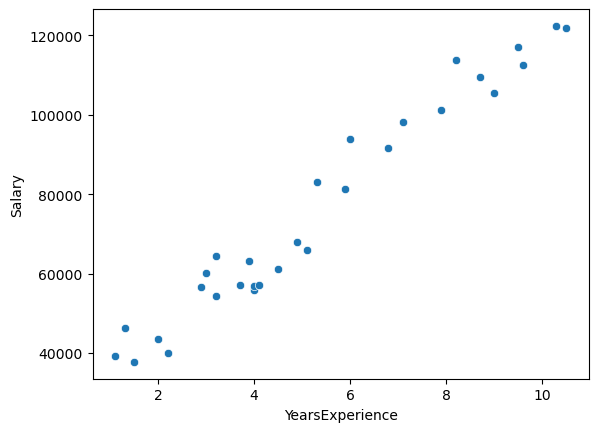

In [15]:
sn.scatterplot(x=df['YearsExperience'],y=df['Salary'])

Scatter plot shows there is a positive linear relation between Years of experience and Salary.<br>
i.e, a person's salary increases over experience.

<AxesSubplot:>

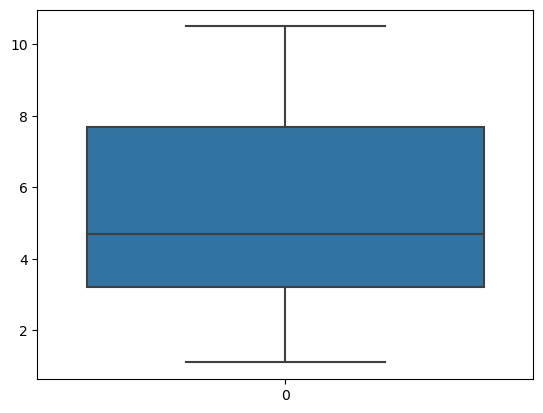

In [16]:
sn.boxplot(df.YearsExperience)

<AxesSubplot:>

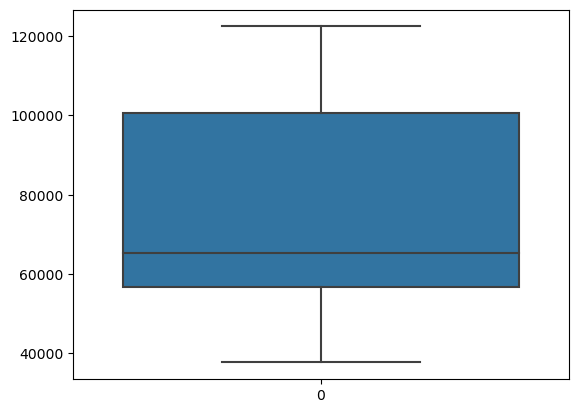

In [17]:
sn.boxplot(df.Salary)

<AxesSubplot:>

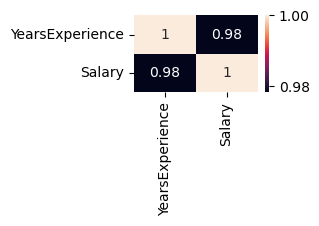

In [18]:
# Lets check the correlation
plt.figure(figsize=(2,1))
sn.heatmap(df.corr(),annot=True)

they is a strongly positive correlation between our feature and target variable.

## Applying Linear Regression 

In [19]:
model=smf.ols('Salary~YearsExperience',data=df).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           1.14e-20
Time:                        13:14:41   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our model gives a good score having accuracy of 95.7%

#### Now Lets do some transformation on feature variable  

In [21]:
# log transformation
model_log=smf.ols('Salary~np.log(YearsExperience)',data=df).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           3.25e-13
Time:                        13:14:41   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# exp 
model_exp=smf.ols('Salary~np.exp(YearsExperience)',data=df).fit()
model_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     25.07
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           2.72e-05
Time:                        13:14:41   Log-Likelihood:                -339.03
No. Observations:                  30   AIC:                             682.1
Df Residuals:                      28   BIC:                             684.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                6.757e+04   4065.396     16.620      0.000    5.92e+04    7.59e+04
np.exp(YearsExperience)     2.1360      0.427      5.007      0.000       1.262       3.010
==============================================================================
Omnibus:                        4.567   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                1.966
Skew:                           0.276   Prob(JB):                        0.374
Kurtosis:                       1.874   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# square
model_square=smf.ols('Salary~np.square(YearsExperience)',data=df).fit()
model_square.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           1.52e-16
Time:                        13:14:41   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
np.square(YearsExperience)   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# square root
model_sqrt=smf.ols('Salary~np.sqrt(YearsExperience)',data=df).fit()
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           8.57e-18
Time:                        13:14:41   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# x + x^2 

# making new column having values x + x^2
df['x + x^2']=df.YearsExperience+np.square(df.YearsExperience)

model_plus=smf.ols('Salary~Q("x + x^2")',data=df).fit()
model_plus.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     328.8
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           5.21e-17
Time:                        13:14:42   Log-Likelihood:                -310.45
No. Observations:                  30   AIC:                             624.9
Df Residuals:                      28   BIC:                             627.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.625e+04   2174.161     21.275      0.000    4.18e+04    5.07e+04
Q("x + x^2")   719.7705     39.692     18.134      0.000     638.466     801.075
==============================================================================
Omnibus:                        1.514   Durbin-Watson:                   0.946
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                1.416
Skew:                           0.455   Prob(JB):                        0.493
Kurtosis:                       2.448   Cond. No.                         83.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# applying log on y
model_y=smf.ols('np.log(Salary)~YearsExperience',data=df).fit()
model_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           7.03e-18
Time:                        13:14:42   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Comparing All Transformations

In [27]:
pd.DataFrame({'Transformation':['No Tran','log on X','exp on X','Square on X','Square root on X','X + square of X','log on Y'],
              'Model Accuracy':[model.rsquared, model_log.rsquared, model_exp.rsquared, model_square.rsquared ,model_sqrt.rsquared, model_plus.rsquared ,model_y.rsquared]})

,Transformation,Model Accuracy
0,No Tran,0.956957
1,log on X,0.853889
2,exp on X,0.472384
3,Square on X,0.915320
4,Square root on X,0.931001
5,X + square of X,0.921535
6,log on Y,0.931967


So here we can see without any transformation results accuracy of 95.6957%

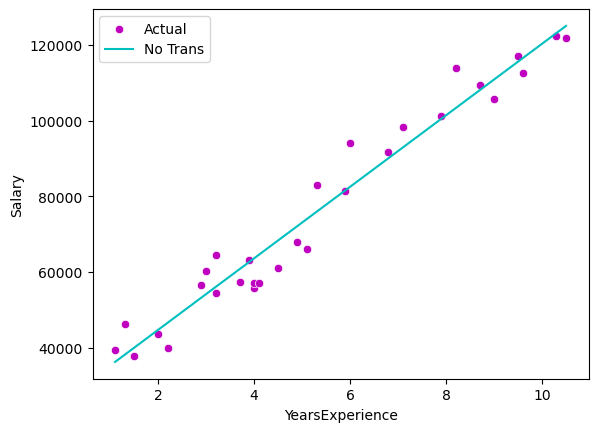

In [36]:
sn.scatterplot(data=df,x='YearsExperience',y='Salary',color='m',label='Actual')
sn.lineplot(data=df,x='YearsExperience',y=model.predict(),color='c',label='No Trans')
plt.legend()

Lets try to remove outliers and check hows our model performs

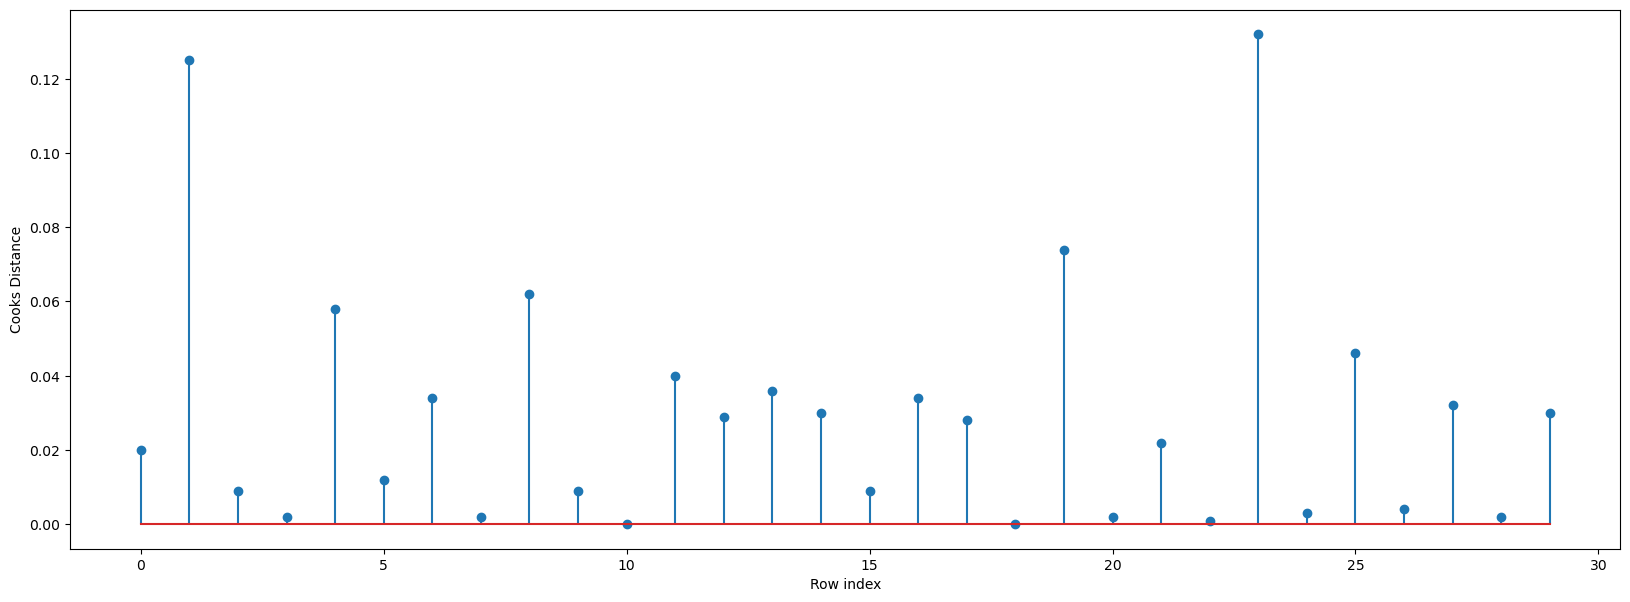

In [29]:
# without any transformation

model_infuence=model.get_influence()
(c,_)=model_infuence.cooks_distance

fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [30]:
# Creating DataFrame without outliers

new_df=df.iloc[np.where(c<=3*2/len(df))]
new_df.shape,df.shape

((30, 3), (30, 3))

In [31]:
# There is no outliers present 

In [32]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

So we created a linear model having intercept of 25792.2 and slope of 9449.96 

In [33]:
df.drop('x + x^2',inplace=True,axis=1)

In [34]:
df['Predicted Salary']=np.around(model.predict(),2)

In [35]:
df

,YearsExperience,Salary,Predicted Salary
0,1.1,39343.0,36187.16
1,1.3,46205.0,38077.15
2,1.5,37731.0,39967.14
3,2.0,43525.0,44692.12
4,2.2,39891.0,46582.12
5,2.9,56642.0,53197.09
6,3.0,60150.0,54142.09
7,3.2,54445.0,56032.08
8,3.2,64445.0,56032.08
9,3.7,57189.0,60757.06
